# **Project Name -   **$\color{purple}{\text{Book Recommender System}}$****    



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - $\color{green}{\text{Pratik Kanjilal}}$**


# **Project Summary -**

**Summary :**

 * Getting the dataset
 * Importing libraries
 * Importing datasets
 * Finding Missing Data
 * Handling Missing Data
 * Visualizing feature importance.(EDA)
 * Feature Engineering
 * ML Model Implementaions. (Both Models)
 * Model Evaluation (Both Models)
 * Best Model Selection

# **GitHub Link -**

https://github.com/Pratik23-pk/book-recommender-system

# **Problem Statement**


**In an increasingly digitalized world, the availability of vast amounts of online reading materials has made it challenging for individuals to identify books that align with their interests, preferences, and reading habits. A key challenge for readers is to navigate this immense library of content to find books that will captivate and engage them. To address this issue, we aim to develop an advanced Book Recommender System that leverages cutting-edge data science techniques to provide personalized and accurate book recommendations to users.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

Image upload

In [1]:
# Uploading the image required for explanation of SVD (present inside the GitHub Repositoriy)
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving SVD_image.png to SVD_image.png


## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

### Dataset Loading

In [3]:
# Load Dataset
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

path1 = '/content/drive/MyDrive/AlmaBetter Datascience/Datasets/Users.csv'
df_user = pd.read_csv(path1)

path2 = '/content/drive/MyDrive/AlmaBetter Datascience/Datasets/Ratings.csv'
df_ratings = pd.read_csv(path2, encoding = "ISO-8859-1", dtype={'text':str})

path3 = '/content/drive/MyDrive/AlmaBetter Datascience/Datasets/Books.csv'
df_books = pd.read_csv(path3, usecols=["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"])

Mounted at /content/drive


**Only the relevant columns to our models have been uploaded**. I have dropped **irrelevant** columns like the **Image URL** columns.

### Dataset First View

#### **User Data**

In [4]:
# Dataset First Look
df_user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


####**Ratings Data**

In [5]:
# Dataset First Look
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


#### **Books Data**

In [6]:
# Dataset First Look
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [7]:
book_data = df_books
users_data = df_user
ratings_data = df_ratings

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(book_data.shape)
print(users_data.shape)
print(ratings_data.shape)

(271360, 5)
(278858, 3)
(1149780, 3)


### Dataset Information

In [9]:
#Books Dataset Info
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [10]:
#Users Dataset Info
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
#Ratings Dataset Info
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
book_data.duplicated().sum()

0

In [13]:
# Dataset Duplicate Value Count
users_data.duplicated().sum()

0

In [14]:
# Dataset Duplicate Value Count
ratings_data.duplicated().sum()

0

## ***2. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

####  book_data dataset

In [15]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [16]:
pd.set_option('display.max_colwidth', -1)

In [17]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


Let's see null values in book_data.

In [18]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


In [19]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [20]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


We pointed null values in 'book_author' and 'publisher' feature.

Let's look at the unique years to realize the time period as this dataset was created in 2004.

In [21]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Let's check at the corresponding rows in the dataframe.

In [22]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [23]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


There has to make some correction in three rows as you can see in above output. Let's fix it.

In [24]:
book_data.loc[221678]


isbn                   0789466953                                                                                                 
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author            2000                                                                                                       
year_of_publication    DK Publishing Inc                                                                                          
publisher              http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
Name: 221678, dtype: object

In [25]:
book_data.loc[209538]

isbn                   078946697X                                                                                          
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author            2000                                                                                                
year_of_publication    DK Publishing Inc                                                                                   
publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
Name: 209538, dtype: object

In [26]:
book_data.loc[220731]

isbn                   2070426769                                                              
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
Name: 220731, dtype: object

#####Data Wrangling

Let's fix it and make it in correct format as per our dataset.

In [27]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [28]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [29]:
book_data.loc[209538]


isbn                   078946697X                                                                    
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
Name: 209538, dtype: object

In [30]:
book_data.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

In [31]:
book_data.loc[220731]

isbn                   2070426769                           
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
Name: 220731, dtype: object

Now it is been fixed. We can view perfect matching for their corresponding features.

We've seen there are two missing values in the 'publisher' column. Let's take care of that. As we have seen

In [32]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [33]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [34]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [35]:
pd.set_option('display.max_columns', None)
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [36]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


So we've change the publisher's name from 'NaN' to 'No Mention'.

#### user_data dataset

In [37]:
# users_data size
print(users_data.shape)

(278858, 3)


In [38]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

There is NaN value in age. We can replace NaN with mean of 'age'.

##### Data Wrangling

In [39]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [40]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [41]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [42]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [43]:
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

As we can see above we don't have any null values for age.

#### ratings_data dataset

In [44]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##### Data Wrangling

In [45]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [46]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [47]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

### What did you know about your dataset?

I got to know about this dataset, that there are many abnormal entries in the age coulumn of the user data.

#### What all missing value imputation techniques have you used and why did you use those techniques?

I replaced all the null values with the mean value of the column.

## ***3. Understanding Your Variables***

**Dataset Description**

The Book-Crossing dataset comprises 3 files.

**Users:**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**Books:**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of- Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLS point to the Amazon website.

**Ratings:**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [48]:
# Dataset Columns
print(users_data.columns)
print(book_data.columns)
print(ratings_data.columns)

Index(['user_id', 'location', 'age'], dtype='object')
Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')
Index(['user_id', 'isbn', 'book_rating'], dtype='object')


In [49]:
# Dataset Describe
users_data.describe(include='all')

,user_id,location,age
count,277546.000000,277546,278858.000000
unique,NaN,57083,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2483,NaN
mean,139430.331181,NaN,34.734852
std,80493.636906,NaN,10.506775
min,1.000000,NaN,5.000000
25%,69715.250000,NaN,29.000000
50%,139424.500000,NaN,34.751434
75%,209134.750000,NaN,35.000000


In [50]:
# Dataset Columns
book_data.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')

In [51]:
# Dataset Describe
book_data.describe(include='all')

,isbn,book_title,book_author,year_of_publication,publisher
count,271360,271360,271359,271360,271360
unique,271360,242135,102021,200,16805
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [52]:
# Dataset Columns
ratings_data.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

In [53]:
# Dataset Describe
ratings_data.describe(include='all')

,user_id,isbn,book_rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


### What all manipulations have you done and insights you found?

All unnessesary columns have been excluded.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **df_books dataset**

#### Chart - 1 - Top Authors with most number of books. (Univariate)



Text(0.5, 1.0, 'Top 20 author with number of books')

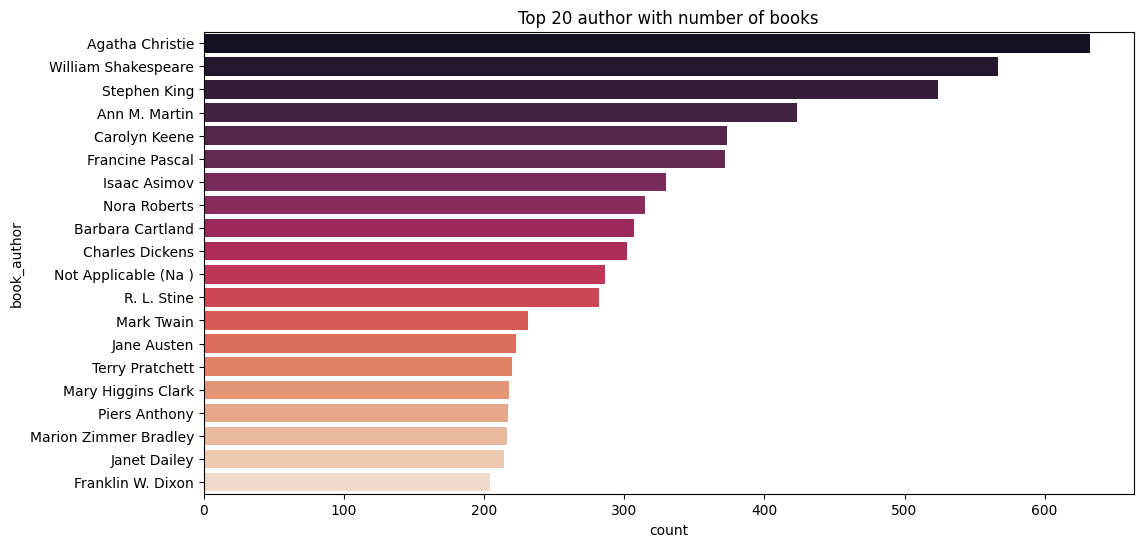

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'rocket', data=df_books,order=df_books['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, **Agatha Christie** is leading at top with more than 600 counts, followed by **William Shakespeare**.

**Hypothesis points** :-
* It can happen in some possible cases that Agatha Christie is not the best Author, though Agatha Christie has most number of books as compared to others.
* **William Shakespeare** is one of the popular Author in the world. Still he doesn't have highest number of books.
* Among all other Authors, it might happen that few of the Authors might have some of the best seller books who have millions of copies been sold in world.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 2 - Top publishers with total no. of published books (Univariate)

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

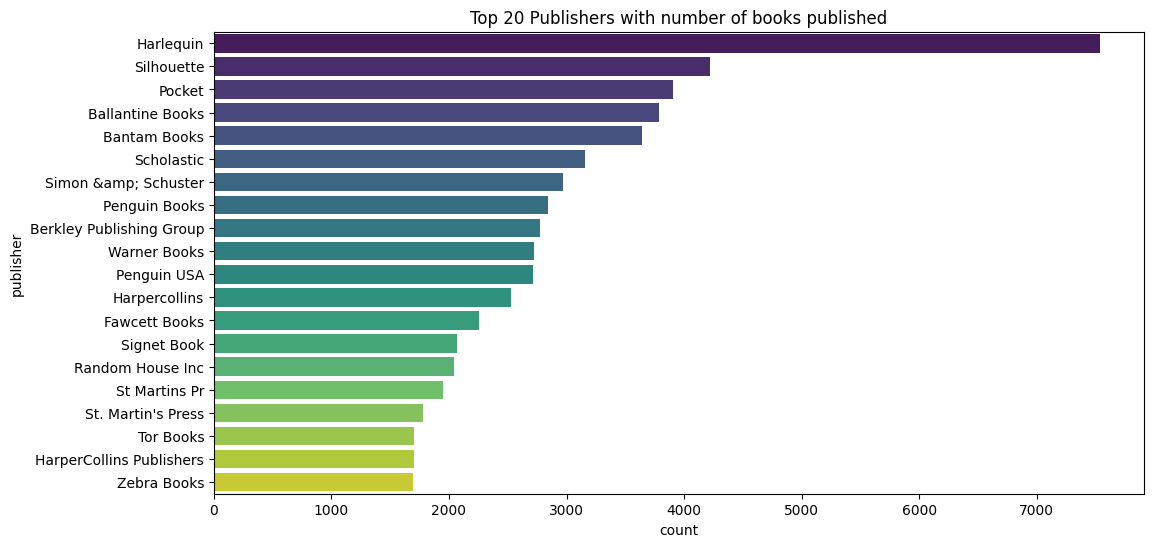

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'viridis', data=df_books,order=df_books['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

**Harlequin** has most number of books published, followed by **Silhouette**.

 **Hypothesis points** :-
* Some of the top Author's had published their books with publisher **Harlequin**.
* We can observe **Harlequin publisers** have made better performance than any other publishers.
* **Penguin Books**, **Warner Books**, **Penguin USA**, **Berkely Publishing Group** and many more are among popular publishers are competing with **Harlequin**.
* Though **Penguin Books** publisher has less number of books published but it might happen that only top authors are approaching towards Penguin Books Publisher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 3 - Number of Books published in yearly. (Univariate)

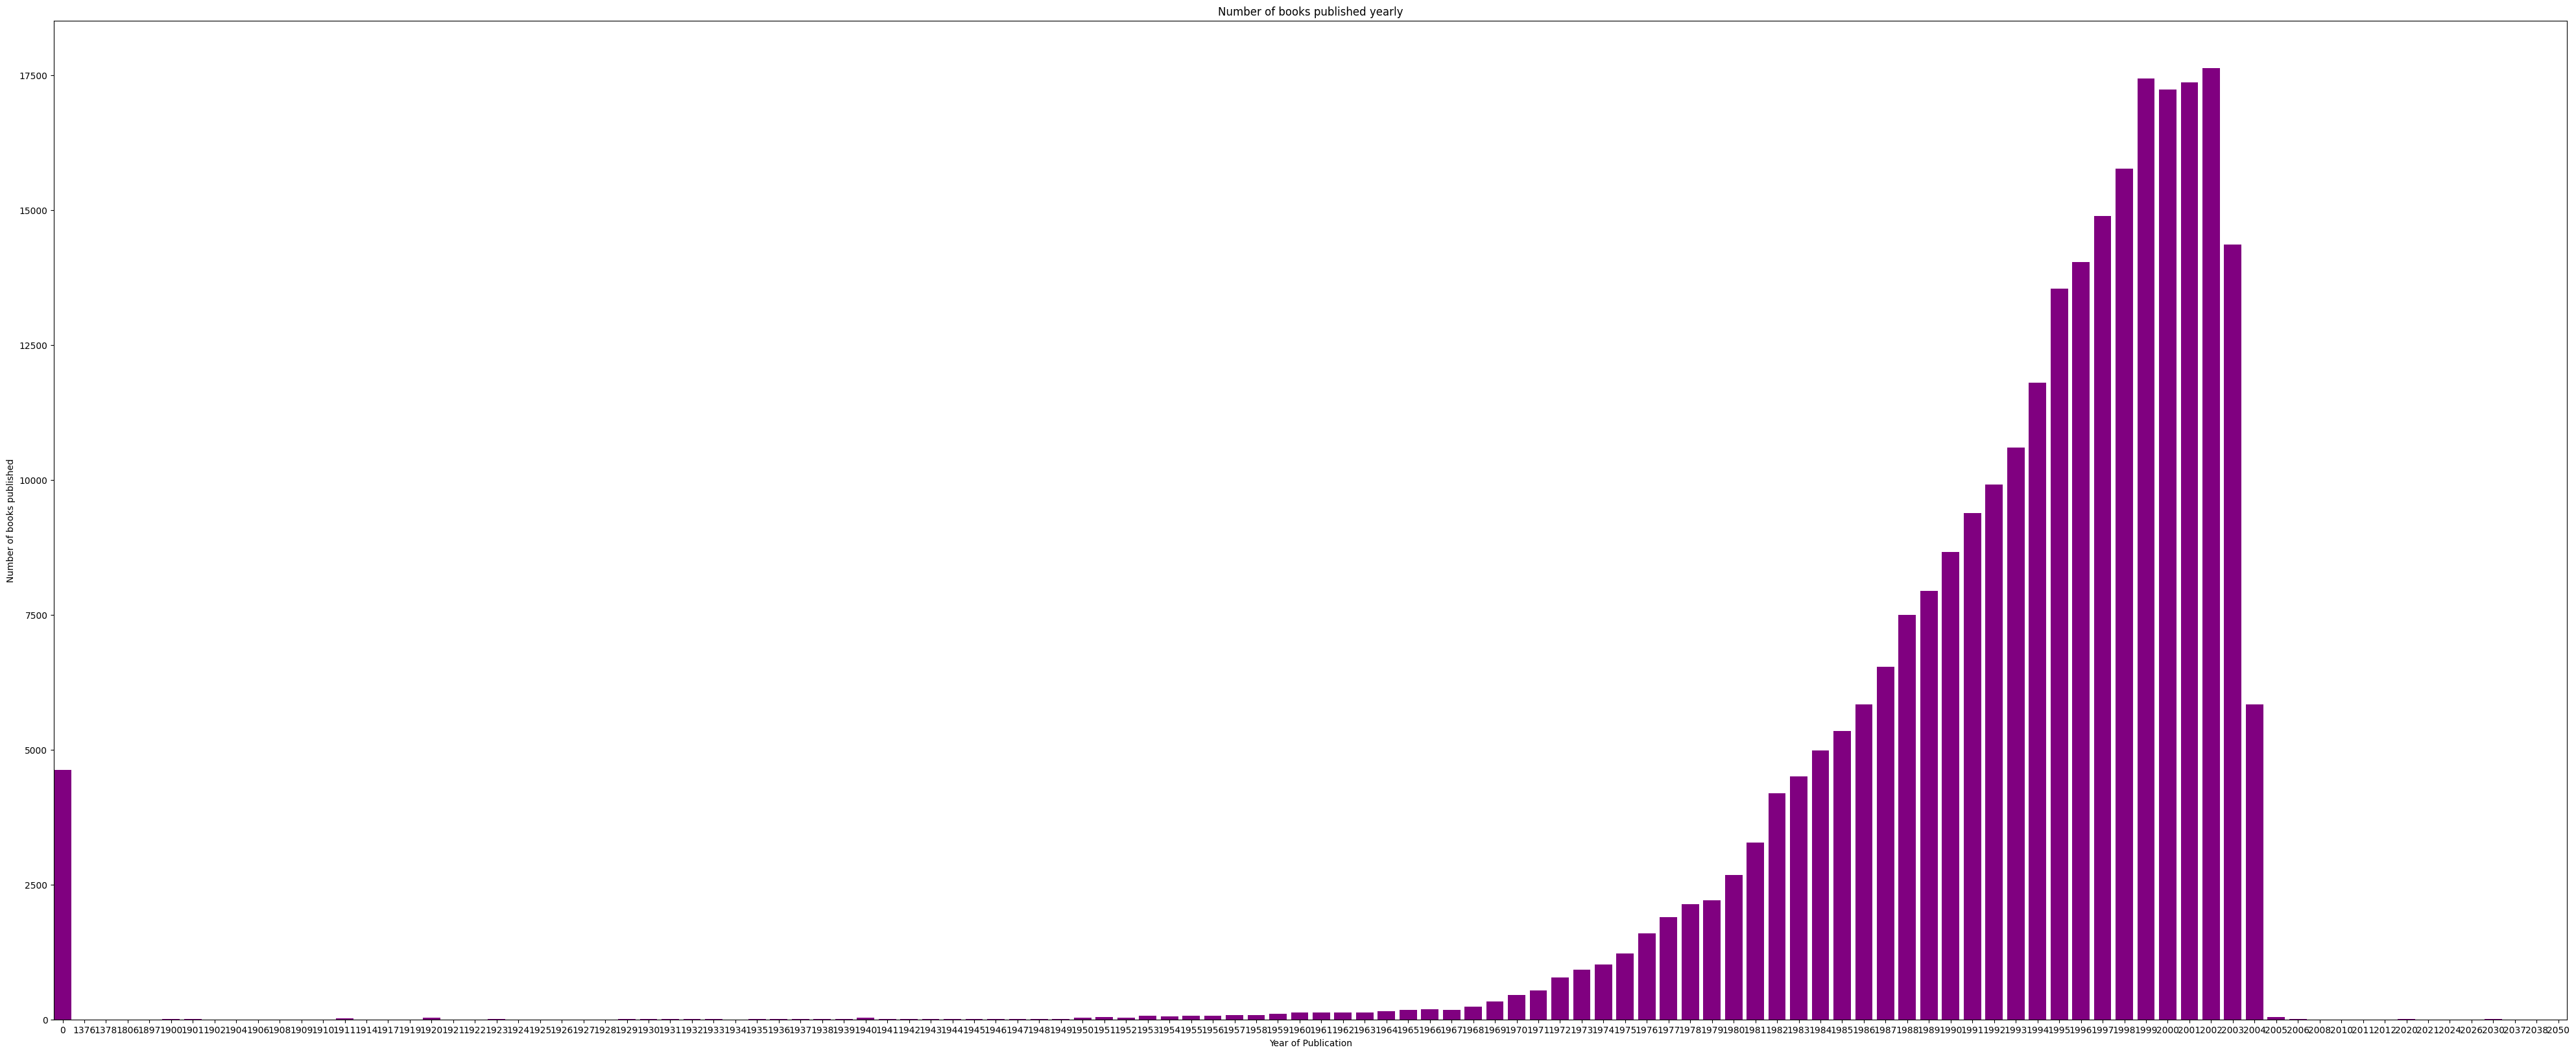

In [56]:
publications = {}
for year in df_books['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(50, 20))
plt.bar(list(publications.keys()),list(publications.values()), color = 'purple')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [57]:
df_books.year_of_publication = pd.to_numeric(df_books.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = df_books[df_books.year_of_publication == 0].year_of_publication.count()
nan_year = df_books.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
df_books.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


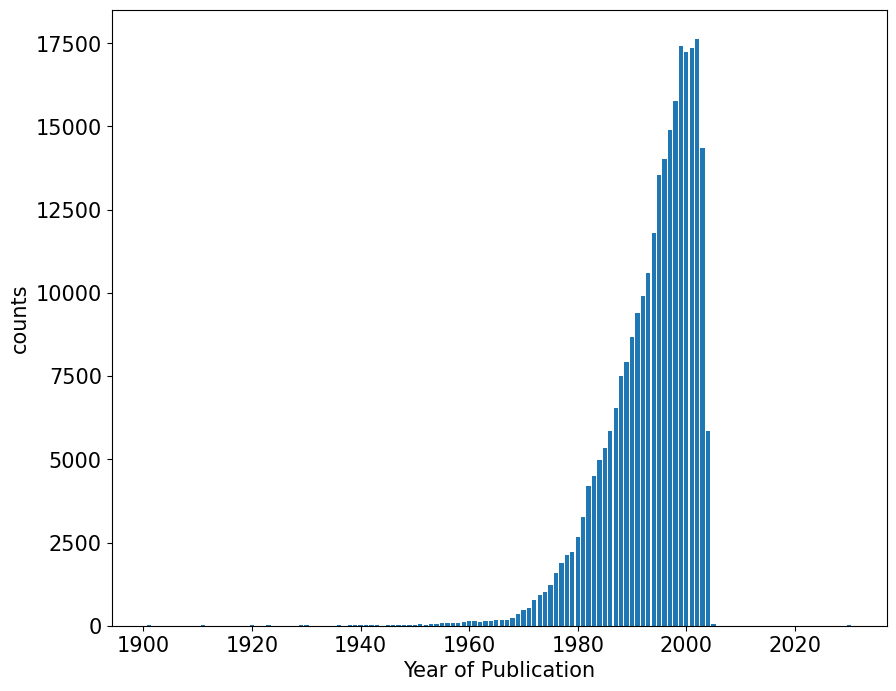

In [58]:
year = df_books.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation that displays the distribution of numerical data. It's particularly useful for understanding the frequency or count of data points falling into different ranges or "bins." Histograms provide insights into the underlying data distribution, including central tendencies, spread, and potential patterns.

##### 2. What is/are the insight(s) found from the chart?

We can see **publication years** are between **1950 - 2005** in this dataset.The publication of books got vital when it started **emerging** from **1950**.

**Hypothesis points**:-
* It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
* **Every user has their own taste** to read books based on what particular subject Author uses. The subject of writing books got to emerge from **late 1940s** gradually **till 1970**

* The **highest peak** we observed is between **1995-2001** year.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

### **User_data Dataset**

#### Chart - 4 - Age distributions of users_data (Univariate)

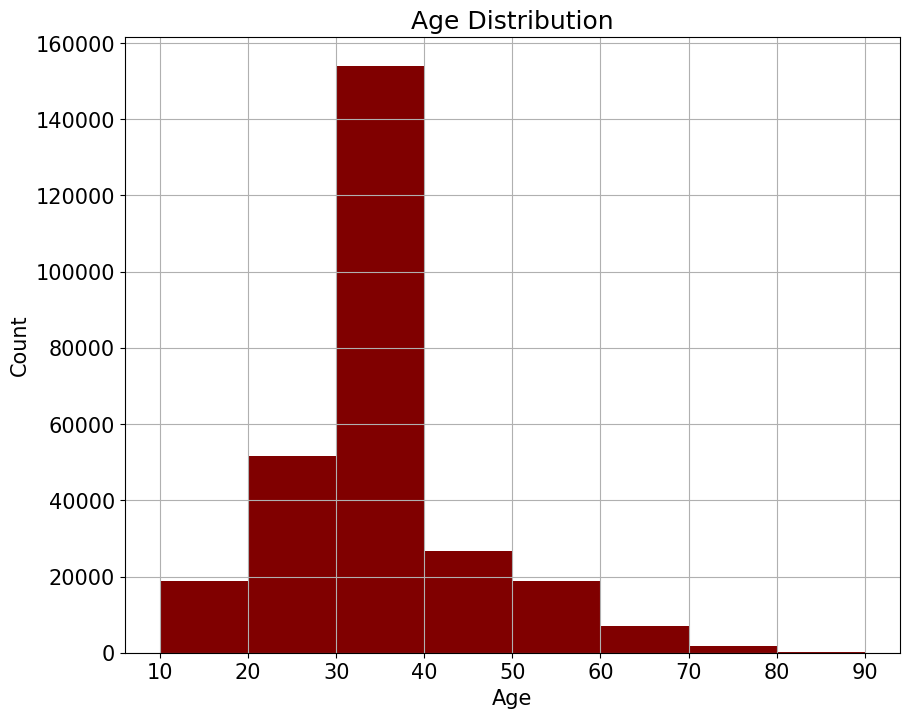

In [59]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'maroon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation that displays the distribution of numerical data. It's particularly useful for understanding the frequency or count of data points falling into different ranges or "bins." Histograms provide insights into the underlying data distribution, including central tendencies, spread, and potential patterns.

##### 2. What is/are the insight(s) found from the chart?

Looking towards the users, users with age between 30-40 prefer reading books more and somewhat we can also view between age-group 20-30 years.

**Hypothesis points**:-
* It is obvious that most of the users love to read books are from age-group of **30 to 40**.
* It might happen that the users are more interested on that subject which the authors are publishing in the market.
* The age group between **20-30** are immensely attracted to read books published by authors.
* We can observe the same pitch for age-group between **10-20** and **50-60**. There are can be a lot of different reasons for that.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

### **Ratings_data Dataset**

#### Chart - 5 - Top 20 books based on number of ratings (Univariate)

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

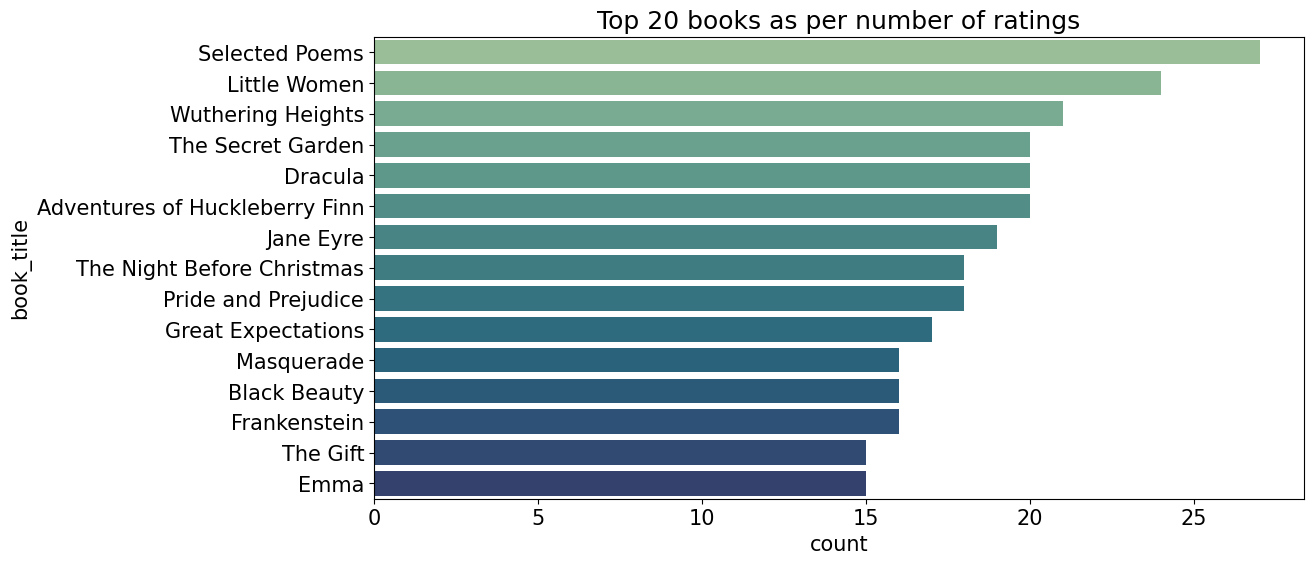

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'crest',data= df_books, order=df_books['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

As per ratings "**Selected Poems**" has been **rated the most** followed by "**Little Women"**.

**Hypotheis points** :-
* **Selected Poems** is most favourable to users as per ratings.
* Three of the books '**The Secret Garden**', '**Dracula**','**Adventures of Huckleberry Finn**' are struggling to compete with each other. Similarly, we can observe the same in '**Masquerade**','**Black Beauty**','**Frankenstein**'.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 6 - All Book Ratings (Univariate)

<Axes: xlabel='book_rating', ylabel='count'>

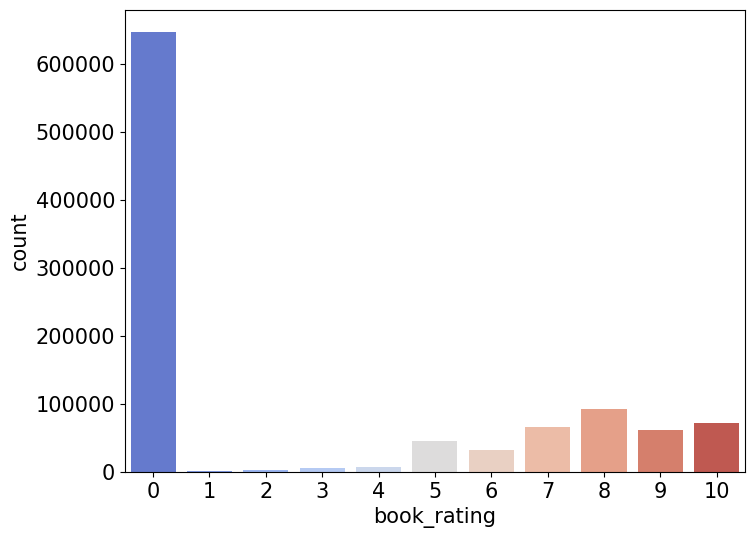

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'coolwarm',data= unique_ratings)

##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Firstly the above ratings are unique ratings from '**ratings_data**' and '**books_data**' dataset.
 We have to separate the **explicit ratings** represented by **1–10** and **implicit ratings** represented by **0**.

**Hypothesis points** :-
* This countplot shows that **users have rated 0 the most**, which means they haven't rated books at all.
* Still we can observe a **pattern** to recognize in ratings from **1-10**.
* **Mostly the users have rated 8 ratings out of 10 as per books**. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 7- Explicit Ratings Seperated from Implicit Ratings (Univariate)

Text(0.5, 1.0, 'Explicit Ratings')

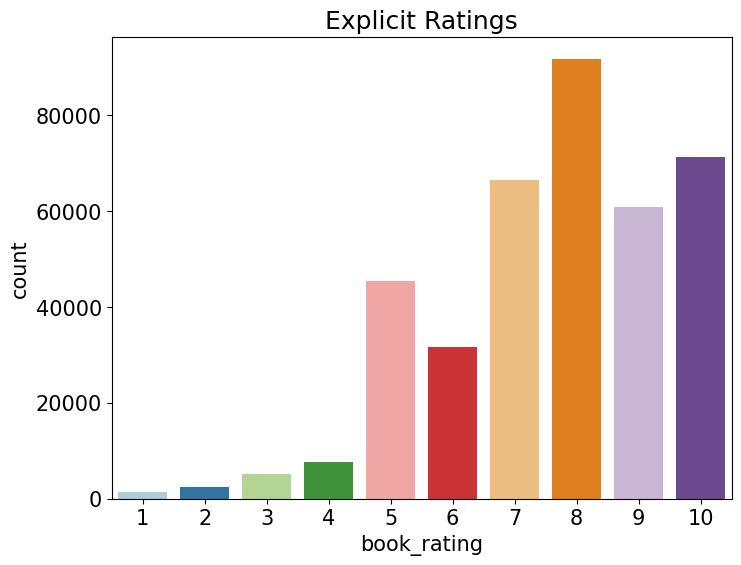

In [62]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Now we can compare the unique ratings and their counts in a better way.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

## ***5. ML Model Implementation***

### **ML Model - 1**  --> Content based recommender(**based on Title**)

Content based recommender system uses **cosine similarity** to map attributes (in my case, **text**) in order to determine which items are most similar to one another. Because of this, there is no way to measure the accuracy of the models and the results are more subjective.

#### **Feature Manipulation & Selection**

In [63]:
df_books.head(5)

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [64]:
#Extracting relevant columns that would influence a book's rating based on book title.
books_title = df_books[[ 'book_title']]
books_title.head()


,book_title
0,Classical Mythology
1,Clara Callan
2,Decision in Normandy
3,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It
4,The Mummies of Urumchi


#### **Textual Data Preprocessing** (It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)


In [65]:
# Importing required libraries to work with NLP
#!pip install nltk
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [66]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.metrics import precision_score, recall_score, f1_score

**Lowercasing , Removing Stopwords & Removing punctuations during Tokenisation**

In [67]:
# Define stopwords and punctuation
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

In [68]:
# Preprocess and tokenize book titles
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in punctuation and token not in stop_words]
    return " ".join(tokens)

In [69]:
# Preprocess book titles using Pandas
books_title['preprocessed_title'] = books_title['book_title'].apply(preprocess)

**Vectorization**

In [70]:
# Create a TF-IDF vectorizer to convert preprocessed book titles into TF-IDF features
vectorizer = TfidfVectorizer(max_features=300)  # Adjust max_features as needed

In [71]:
# Fit the vectorizer on the entire preprocessed titles
vectorizer.fit(books_title['preprocessed_title'])

TfidfVectorizer(max_features=300)

In [72]:
# Transform all book titles into TF-IDF features
books_title_tfidf = vectorizer.transform(books_title['preprocessed_title'])

**Dimensionality Reduction (Truncated SVD)**

In [73]:
# Applying Truncated SVD to the entire books_title_tfidf matrix
num_components = 50
svd = TruncatedSVD(n_components=num_components)
books_title_svd = svd.fit_transform(books_title_tfidf)


User input based get_recommendations() function **(Using Cosine Similarity)**

In [74]:
# Encapsulated get_recommendation function
def get_recommendation(user_book, books_title, books_title_svd):
    # Preprocess user input book title
    user_book_preprocessed = preprocess(user_book)

    # Transform user input into TF-IDF features
    user_tfidf = vectorizer.transform([user_book_preprocessed])

    # Apply Truncated SVD to user input
    user_reduced_tfidf = svd.transform(user_tfidf)

    # Find similar books using cosine similarity
    cosine_similarities = cosine_similarity(user_reduced_tfidf, books_title_svd)
    similar_indices = cosine_similarities[0].argsort()[:-6:-1]

    # Get recommended book titles
    recommended_books = books_title['book_title'].iloc[similar_indices].tolist()

    return recommended_books


**Model Evaluation**

In [75]:
# User input: The book title for which we want to find recommendations
user_book = "There's a Bat in Bunk Five"

In [76]:
# Call the get_recommendation function
recommended_books = get_recommendation(user_book, books_title, books_title_svd)

# Calculate binary evaluation metrics for the recommendations
relevant_books = [1 if book == user_book else 0 for book in recommended_books]
precision = precision_score(relevant_books, [1] * len(recommended_books), average='binary')
recall = recall_score(relevant_books, [1] * len(recommended_books), average='binary')
f1 = f1_score(relevant_books, [1] * len(recommended_books), average='binary')

print("Recommended Books:")
for i, book in enumerate(recommended_books, start=1):
    print(f"{i}. {book}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Recommended Books:
1. Escape from Five Shadows
2. Focusing (Fabulous Five)
3. Traditional Acupuncture: The Law of the Five Elements
4. Mosaic: A Chronicle of Five Generations
5. Five Chimneys
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


This is what **the content based recommender(title based) system** predicted for the **given book title**. **There is basically no evaluation metric** for this kind of model as **evaluation of a book recommender system is calculated using the ratings** which I am going to show on the **SVD model**. Still if we assume as **actually similar** and **not similar** as 2 classes, we can evaluate the model by classifiying the recommended books, and we get **Precision**, **Recall** and **F1 score**.
But since **this model is not a very good model**, it does not have significant scores.  

### **ML Model - 2** --> Colaborative filtering using **Model** based aprroach **(SVD)**

This is an user-based recommendation engine which performs dimensionality reduction using SVD and gets top predictions of books to read for a given user_id.

#### **Feature Manipulation & Selection**

In [77]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

Dividing the ratings into two groups **implicit** and **explicit**.

In [78]:
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [79]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


In [80]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


Merging the dataset to get the required features all together for the SVD model.

In [81]:
print(new_book_df.shape)

(383842, 7)


In [82]:
new_book_df['book_title'].nunique()

135567

####**Model Building**

In [83]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811596 sha256=376df2498e0b0eafd7b76061e8d592343460ab045a57416d56420a0fee867eb5
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [84]:
from surprise import Reader, Dataset

In [85]:
# Creating a 'Reader' object to set the limit of the ratings
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

#####**Cross - Validation**

In [86]:
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6317  1.6274  1.6420  1.6449  1.6358  1.6364  0.0064  
Fit time          15.19   21.71   8.96    8.78    11.82   13.29   4.81    
Test time         1.83    1.91    0.96    0.59    1.23    1.30    0.51    
CPU times: user 1min 7s, sys: 629 ms, total: 1min 8s
Wall time: 1min 28s


{'test_rmse': array([1.63173993, 1.62743902, 1.64198632, 1.64489985, 1.63580561]),
 'fit_time': (15.193642139434814,
  21.70584464073181,
  8.96104121208191,
  8.777312517166138,
  11.818786859512329),
 'test_time': (1.8296928405761719,
  1.9088261127471924,
  0.957282304763794,
  0.5871946811676025,
  1.227614402770996)}

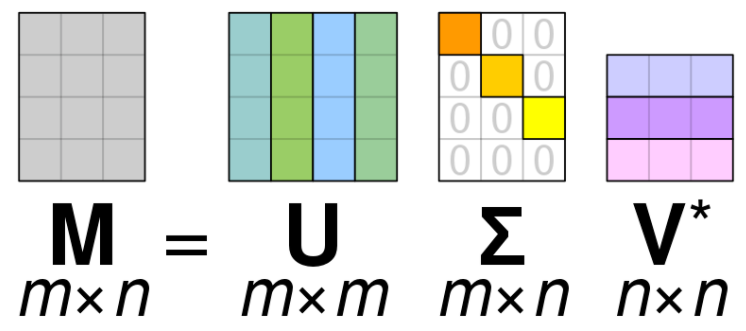

In [87]:
Image('/content/SVD_image.png')

##### **Data Splitting(Train, Test) and Fitting on the Model**

In [88]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

##### **Evaluations Metric Score**

In [89]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.6318
The accuracy is 1.6317718992015584


Now, we got a better accuracy score!

##### **Model Testing by taking random user_id as User Input.**

In [90]:
# to test the results let's take an user-id and item-id to test our model.
uid = 276744
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.44   {'was_impossible': False}


In [91]:
# display estimated rating and real rating

print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')

actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) &
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.44.

The real rating given for this was 7.00.


In [92]:
# Function to get the top book recommendations for each user
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [93]:
# Prediciton on test-set and getting top predictions
pred = model.test(testset)
top_n = get_top_n(pred)

Visualising the estimated ratings of users on particular books compared to the real rating of the user on a particular book.

In [94]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,8864,0804113831,8.0,7.369557,{'was_impossible': False}
1,112502,0060670843,8.0,8.394807,{'was_impossible': False}
2,42597,0440221595,9.0,7.624972,{'was_impossible': False}
3,231081,0312565194,10.0,7.823524,{'was_impossible': False}
4,188350,0671027360,8.0,8.029330,{'was_impossible': False}
...,...,...,...,...,...
76764,149907,0671887254,8.0,8.661168,{'was_impossible': False}
76765,234828,0345384911,8.0,7.445460,{'was_impossible': False}
76766,164048,043935806X,10.0,8.751172,{'was_impossible': False}
76767,230985,1565294394,10.0,7.646698,{'was_impossible': False}


In [95]:
# Function to get the reading list(recommended books) for a given user_id
def get_reading_list(userid):

    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [96]:
#Let's take a random user_id
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Chaos: Making a New Science: 8.044512720730475
The Complete Idiot's Guide to Javascript: 7.795787807074106
The Moscow Puzzles: 359 Mathematical Recreations: 7.795787807074106
Death With Reservations (Pennyfoot Hotel Mystery Series , No 10): 7.795787807074106
Particle Physics: A Los Alamos Primer: 7.795787807074106
Elementary Statistics: 7.795787807074106
Calculus: Early Transcendental Functions: 7.795787807074106
Algebra and Trigonometry, Unit Circle (6th Edition): 7.795787807074106
Full Spectrum 3: 7.793981109977526
SHIPPING NEWS: 7.793226717497033


This is the reading list of recommended books for the given user recommended by our model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**RMSE: 1.6323** is the accuracy score of our model, which is quite a good score which indicates this model can impact positively to its relevant buisnesses.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen the **colaborative filtering based model(SVD model)** as **my final prediction model** for this dataset, because we don't have any **"book_description"** column, therefore I could only manage to build only a **title based book recommender system(content based)** which **not an ideal model** to predict **similar books based on book title** and is not robust either.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

RMSE should be considered as the only evaluation metric which indicates the difference between the actual ratings and predicted ratings. The lesser the RMSE, better the model. Using this RMSE to tune the model can generate positive impact on the relevant buisnesses.

# **Conclusion**

* Among top 20 Authors the **highest number of books** has been written by **Agatha Christie**. Agatha Christie is leading at top with more than **600 counts**, followed by **William Shakespeare**.

* **Harlequin** has most number of books published, followed by **Silhouette**.

* Number of Books published yearly are in between a time-span  of **1950 - 2005**.

* Mostly the users aged between **30-40 years** prefer reading more books, followed by the users aged between **20-30 years**.

* As per ratings "**Selected Poems**" has been rated the most, followed by "**Little Women**".

* The countplot shows **users have rated 0 the most**, which means **they haven't rated books at all**.

* As we perform **cosine similarity** in recommendation system it gives **very low accuracy score** because we need more **textual description** columns in order to perform **cosine similarity** on the **TF-IDF vectorizer**.

* We performed **Dimensionality Reduction** using **Truncated SVD**, **which is different from SVD**.

* Our **SVD model** has **improved the accuracy score(RMSE)** to **1.63** ,  by performing Singular Value Decomposition.

* Based on the Evaluation Metrics, We Consider Our **SVD model**(Collaborative Filtering based) is the best and **Final Model**.

* As **model based approach** was best to signify, at last we got **top 10 recommended books** and **ratings** respectively.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***